<a href="https://colab.research.google.com/github/alfariziwiranata/Pemrogaman_Pyhton/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [93]:
f1=1800 #MHz
f2=900 #MHz
f3=700 #MHz
loc='urban'
loca='suburban'
locb='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [94]:
LpUrban=cos(f1,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [95]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban_sort2=LpUrban2[np.argsort(d)]
Urban_sort3=LpUrban3[np.argsort(d)]

In [97]:
LpSuburban=cos(f1,loca,tower,user,d)

In [99]:
d_sort=d[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]

In [100]:
LpOpen=cos(f1,locb,tower,user,d)

In [101]:
d_sort=d[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

In [102]:
NtL = lambda x: 10*np.log10(x)

In [103]:
LtN = lambda z: 10**(z/10)

In [104]:
def Prx(Ptx,Pl,Gtx,Grx):
  PtdB = NtL(Ptx)
  prxdBm = PtdB - Pl + Gtx + Grx
  prx = LtN(prxdBm)
  return prx

In [105]:
a=30000 #miliwatt
b=Urban_sort
c=Suburban_sort
d=Open_sort
e=10 #dB
f=2 #dB
g=Urban_sort2
h=Urban_sort3

In [106]:
PrxUrban = Prx(a,b,e,f)
PrxSuburban = Prx(a,c,e,f)
PrxOpen = Prx(a,d,e,f)
PrxUrban2 = Prx(a,g,e,f)
PrxUrban3 = Prx(a,h,e,f)

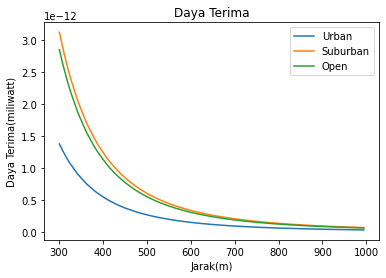

In [107]:
plt.figure()
plt.plot(d_sort,PrxUrban,label='Urban')
plt.plot(d_sort,PrxSuburban,label='Suburban')
plt.plot(d_sort,PrxOpen,label='Open')
plt.legend()
plt.title('Daya Terima')
plt.xlabel('Jarak(m)')
plt.ylabel('Daya Terima(miliwatt)')
plt.show()

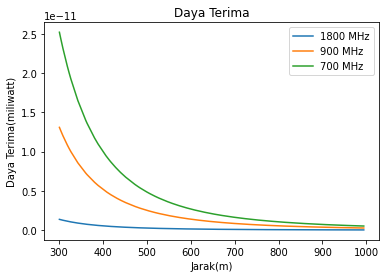

In [108]:
plt.figure()
plt.plot(d_sort,PrxUrban,label='1800 MHz')
plt.plot(d_sort,PrxUrban2,label='900 MHz')
plt.plot(d_sort,PrxUrban3,label='700 MHz')
plt.legend()
plt.title('Daya Terima')
plt.xlabel('Jarak(m)')
plt.ylabel('Daya Terima(miliwatt)')
plt.show()

In [109]:
def SNR(PRX,Bw):
  Noise = -174 + NtL(Bw)
  No = LtN(Noise)
  snr = PRX/No
  return snr

In [110]:
PRX1=PrxUrban
PRX2=PrxSuburban
PRX3=PrxOpen
PRX4=PrxUrban2
PRX5=PrxUrban3
Bw=5000000 

In [111]:
snrUrban = SNR(PRX1,Bw)
snrSuburban = SNR(PRX2,Bw)
snrOpen = SNR(PRX3,Bw)
snrUrban2 = SNR(PRX4,Bw)
snrUrban3 = SNR(PRX5,Bw)

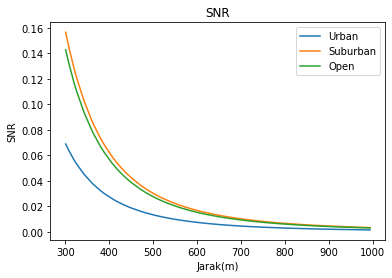

In [121]:
plt.figure()
plt.plot(d_sort,snrUrban,label='Urban')
plt.plot(d_sort,snrSuburban,label='Suburban')
plt.plot(d_sort,snrOpen,label='Open')
plt.legend()
plt.title('SNR')
plt.xlabel('Jarak(m)')
plt.ylabel('SNR')
plt.show()

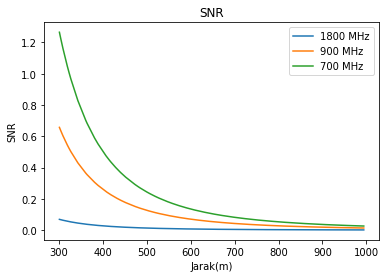

In [120]:
plt.figure()
plt.plot(d_sort,snrUrban,label='1800 MHz')
plt.plot(d_sort,snrUrban2,label='900 MHz')
plt.plot(d_sort,snrUrban3,label='700 MHz')
plt.legend()
plt.title('SNR')
plt.xlabel('Jarak(m)')
plt.ylabel('SNR')
plt.show()

In [92]:
def capacity(SnR,BW):
  celcap = BW*np.log2(1+SnR)
  return celcap

In [114]:
i=snrUrban
j=snrSuburban
k=snrOpen
l=snrUrban2
m=snrUrban3
BW=Bw

In [115]:
celcapUrban = capacity(i,BW)
celcapSuburban = capacity(j,BW)
celcapOpen = capacity(k,BW)
celcapUrban2 = capacity(l,BW)
celcapUrban3 = capacity(m,BW)

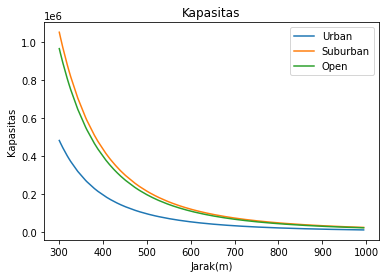

In [119]:
plt.figure()
plt.plot(d_sort,celcapUrban,label='Urban')
plt.plot(d_sort,celcapSuburban,label='Suburban')
plt.plot(d_sort,celcapOpen,label='Open')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak(m)')
plt.ylabel('Kapasitas')
plt.show()

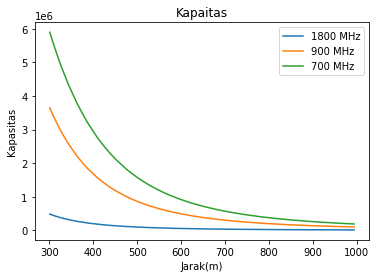

In [118]:
plt.figure()
plt.plot(d_sort,celcapUrban,label='1800 MHz')
plt.plot(d_sort,celcapUrban2,label='900 MHz')
plt.plot(d_sort,celcapUrban3,label='700 MHz')
plt.legend()
plt.title('Kapaitas')
plt.xlabel('Jarak(m)')
plt.ylabel('Kapasitas')
plt.show()